# Live Code 1 Phase 1

## 1. PERKENALAN

- Name: Alexander Prasetyo Christianto
- Last Education: Electrical Engineering Bachelor Degree
- Occupation: Full Time Data Science Bootcamp Student at Hacktiv8
- Batch: 001

## 2. Judul / Penanda Soal

- Membuat sebuah model linear regression untuk memprediksi closing price saham Amazon.
- Membuat visualisasi yang menampilkan closing price saham Amazon, Cisco, Apple, dan Netflix berdasarkan date (time series). Saham apa yang memiliki closing price tertinggi dan terendah di akhir tahun 2014, 2015 dan 2016?
- Membuat sebuah model Logistic Regression untuk memprediksi Loan Pay Back.
- Dengan dataset nomor 3, berapa jumlah fully paid tertinggi dan terendah berdasarkan purpose?

### TENTANG DATASET

Dataset diambil dari "https://www.kaggle.com/dgawlik/nyse?select=prices-split-adjusted.csv" dan "https://www.kaggle.com/sarahvch/predicting-who-pays-back-loans?select=loan_data.csv". File yang digunakan adalah file `prices-split-adjusted.csv` dan `loan_data.csv`.

## 3. IMPORTING LIBRARIES

Berikut adalah daftar *libraries* yang akan digunakan dalam pengerjaan project ini

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error


## 4. DATA LOADING

Pada bagian ini saya memasukkan setiap data ke dalam 2 variabel yang berbeda, yaitu `data_1` dan `data_2`.

In [2]:
data_1 = pd.read_csv('prices-split-adjusted.csv')
data_2 = pd.read_csv('loan_data.csv')

In [3]:
data_1.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [4]:
data_1.tail()

,date,symbol,open,close,low,high,volume
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0
851263,2016-12-30,FTV,54.200001,53.630001,53.389999,54.480000,705100.0


In [5]:
data_2.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
data_2.tail()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


Sekarang saya akan melakukan duplikasi kedua data original ke dalam 2 variabel baru.

In [7]:
data_1_dup = data_1.copy()
data_2_dup = data_2.copy()

## 4. Data Cleaning

In [8]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [9]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [10]:
data_1.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [11]:
data_2.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

Kedua data tidak memiliki *null-value* sama sekali sehingga tidak perlu dilakukan pembersihan data.

In [12]:
data_1.duplicated().any()

False

In [13]:
data_2.duplicated().any()

False

Pada kedua data tersebut juga, tidak terdapat data yang mengalami duplikasi.

Dikarenakan pada `data_1` terdapat kolom yang berisikan tanggal maka saya akan merubah tipe data pada kolom tersebut dari object menjadi tipe data datetime.

In [14]:
data_1['date'] = pd.to_datetime(data_1.date)

In [15]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    851264 non-null  datetime64[ns]
 1   symbol  851264 non-null  object        
 2   open    851264 non-null  float64       
 3   close   851264 non-null  float64       
 4   low     851264 non-null  float64       
 5   high    851264 non-null  float64       
 6   volume  851264 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 45.5+ MB


Tipe data pada kolom `date` di `data_1` berhasil dirunah menjadi tipe data datetime.

## 5. Exploratory Data Analysis (EDA)

#### 2. Membuat visualisasi closing price saham Amazon, Cisco, Apple, dan Netflix.

Berikut adalah 4 grafik yang menggambarkan closing price Amazon, Cisco, Apple dan Netflix

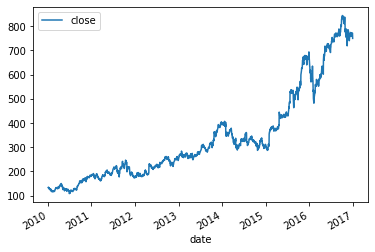

In [16]:
amzn=data_1[data_1['symbol']=='AMZN'][['date','close']].set_index('date').plot()


Grafik di atas merupakan grafik yang menggambarkan closing price dari saham Amazon (AMZN).

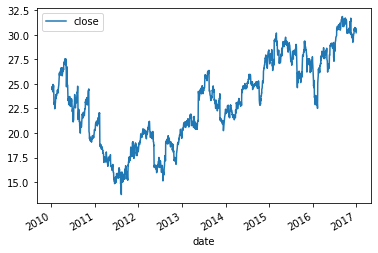

In [17]:
csco=data_1[data_1['symbol']=='CSCO'][['date','close']].set_index('date').plot()

Grafik di atas adalah grafik yang menggambarkan closing price dari saham Cisco (CSCO).

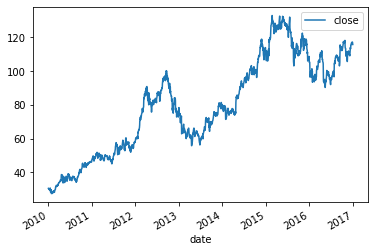

In [18]:
aapl=data_1[data_1['symbol']=='AAPL'][['date','close']].set_index('date').plot()

Grafik di atas merupakan grafik yang menggambarkan closing price saham Apple (AAPL).

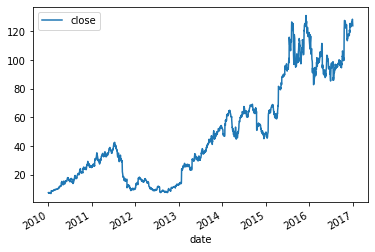

In [19]:
nflx=data_1[data_1['symbol']=='NFLX'][['date','close']].set_index('date').plot()

Grafik di atas adalah grafik yang menggambarkan closing price saham Netfilx (NFLX).

In [20]:
data_1[data_1['date']=='2014-12-31'][['date','symbol','close']].max()

date      2014-12-31 00:00:00
symbol                    ZTS
close             1140.209961
dtype: object

Pada akhir tahun 2014, saham ZTS merupakan stock saham dengan nilai closing price tertinggi yaitu 1140 $

In [21]:
data_1[data_1['date']=='2014-12-31'][['date','symbol','close']].min()

date      2014-12-31 00:00:00
symbol                      A
close                    6.67
dtype: object

Pada akhir tahun 2014, saham A merupakan stock saham dengan closing price terendah yaitu 6.67 $

In [22]:
data_1[data_1['date']=='2015-12-31'][['date','symbol','close']].max()

date      2015-12-31 00:00:00
symbol                    ZTS
close             1274.949951
dtype: object

Pada akhir tahun 2015, saham ZTS merupakan stock saham dengan closing price tertinggi, yaitu 1274 $

In [23]:
data_1[data_1['date']=='2015-12-31'][['date','symbol','close']].min()

date      2015-12-31 00:00:00
symbol                      A
close                     4.5
dtype: object

Pada akhir tahun 2015, saham A merupakan stock saham dengan closing price terendah, yaitu 4.5 $

In [24]:
data_1[data_1['date']=='2016-12-30'][['date','symbol','close']].max()

date      2016-12-30 00:00:00
symbol                    ZTS
close             1466.060059
dtype: object

Pada akhir tahun 2016, saham ZTS merupakan stock saham yang memiliki closing proce tertinggi yaitu 1466 $

In [25]:
data_1[data_1['date']=='2014-12-31'][['date','symbol','close']].min()

date      2014-12-31 00:00:00
symbol                      A
close                    6.67
dtype: object

Pada akhir tahun 2016, saham A merupakan stock saham yang memiliki closing price terendah yaitu 6.67 $

#### 1. Membuat model linear regresi untuk memprediksi closing price AMZN

Selanjutnya, saya akan membuat model machine learning dengan menggunakan metode linear regresi untuk memprediksi harga closing price AMZN.

In [26]:
data_amazon = data_1[data_1['symbol']=='AMZN'].reset_index()
data_amazon.drop('index', axis=1, inplace=True)

Di bawah ini adalah data yang akan saya gunakan untuk membuat model linear regresi AMZN.

In [27]:
data_amazon

,date,symbol,open,close,low,high,volume
0,2010-01-04,AMZN,136.250000,133.899994,133.139999,136.610001,7599900.0
1,2010-01-05,AMZN,133.429993,134.690002,131.809998,135.479996,8851900.0
2,2010-01-06,AMZN,134.600006,132.250000,131.649994,134.729996,7178800.0
3,2010-01-07,AMZN,132.009995,130.000000,128.800003,132.320007,11030200.0
4,2010-01-08,AMZN,130.559998,133.520004,129.029999,133.679993,9830500.0
...,...,...,...,...,...,...,...
1757,2016-12-23,AMZN,764.549988,760.590027,757.989990,766.500000,1976900.0
1758,2016-12-27,AMZN,763.400024,771.400024,761.200012,774.650024,2627400.0
1759,2016-12-28,AMZN,776.250000,772.130005,770.500000,780.000000,3279100.0
1760,2016-12-29,AMZN,772.400024,765.150024,760.849976,773.400024,3153500.0


Karena saya ingin membuat prediksi closing price, maka kolom price merupakan target dari model linear regresi.

Saya akan melakukan correlation checking antar fitur numerikal untuk menghindari kolinearitas.

<AxesSubplot:>

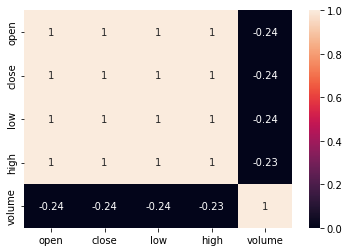

In [28]:
sns.heatmap(data_amazon[['open','close','low','high','volume']].corr(), vmin=0, vmax=1, annot=True)

Berdasarkan grafik di atas, fitur yang memiliki korelasi tertinggi dengan target fitur adalah `open`, `low`, `high`. Maka dari itu saya akan menggunakan ketiga fitur tersebut untuk membuat model.

In [29]:
data_amzn_selected = pd.DataFrame(data_amazon.drop(['symbol','date','volume'], axis=1))
data_amzn_selected

,open,close,low,high
0,136.250000,133.899994,133.139999,136.610001
1,133.429993,134.690002,131.809998,135.479996
2,134.600006,132.250000,131.649994,134.729996
3,132.009995,130.000000,128.800003,132.320007
4,130.559998,133.520004,129.029999,133.679993
...,...,...,...,...
1757,764.549988,760.590027,757.989990,766.500000
1758,763.400024,771.400024,761.200012,774.650024
1759,776.250000,772.130005,770.500000,780.000000
1760,772.400024,765.150024,760.849976,773.400024


Sekarang saya sudah mempunyai variabel baru yang hanya berisikan fitur yang saya butuhkan untuk pembuatan model.

##### AMZN MODEL INFERENCE

In [30]:
data_amzn_inf = data_amzn_selected.sample(10, random_state=1)
data_amzn_inf.drop(columns='close', axis=1, inplace=True)

##### DROPPING INFERENCE MODEL FROM DATA AND RESETTING INDEX

Setelah mendapatkan model inferens, saya akan memisahkan model inferens dari data train test dan kemudian akan melakukan *reset index* pada model inferens dan juga data train test.

In [31]:
amzn_train_test = data_amzn_selected.drop(data_amzn_inf.index)
amzn_train_test.reset_index(drop=True, inplace=True)
data_amzn_inf.reset_index(drop=True, inplace=True)

In [32]:
X = amzn_train_test.drop('close', axis=1)
y = amzn_train_test['close']

##### Splitting Train and Test Data

Langkah selanjutnya adalah melakukan split data train dan test dengan rasio 80 % dan 20 %

In [33]:
# Split between Train-Set and Test-Set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (1401, 3)
Test Size  :  (351, 3)


Ukuran data train terdapat 1401 baris dan 3 kolom. Sedangkan ukuran data test adalah 351 baris dan 3 kolom.

Langkah selanjutnya adalah melakukan pengecekan null-value pada data test dan data train

In [34]:
X_train.isnull().sum()

open    0
low     0
high    0
dtype: int64

In [35]:
X_test.isnull().sum()

open    0
low     0
high    0
dtype: int64

In [36]:
y_train.isnull().sum()

0

In [37]:
y_test.isnull().sum()

0

Tidak terdapat null value sama sekali pada data train dan data test.

##### Handling Features Outliers

In [38]:
X_train['open'].skew()

1.0981951036992037

In [39]:
X_train['low'].skew()

1.10424481862937

In [40]:
X_train['high'].skew()

1.0925162870769347

Text(0.5, 1.0, 'Histogram of High Price')

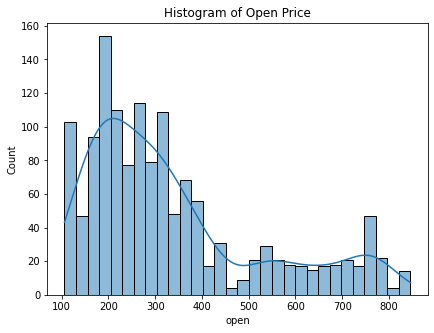

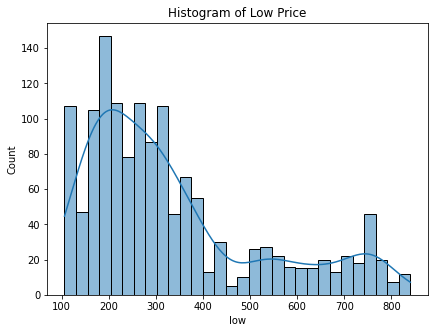

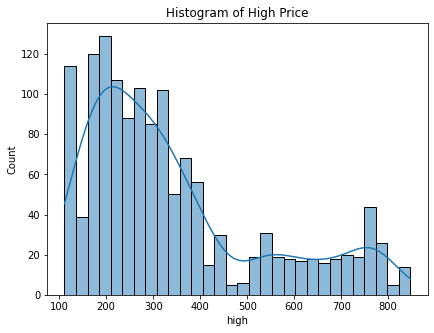

In [41]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(X_train['open'], bins=30, kde=True)
plt.title('Histogram of Open Price')

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(X_train['low'], bins=30, kde=True)
plt.title('Histogram of Low Price')

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(X_train['high'], bins=30, kde=True)
plt.title('Histogram of High Price')

Dari analisis di atas, didapatkan informasi bahwa semua fitur pada `X_train` memiliki persebaran data secara right-skew. Oleh karena itu, saya akan melakukan handling outlier terlebih dahulu.

In [42]:
def find_skewed_boundaries(df, variable, open):
    IQR = X_train[variable].quantile(0.75) - X_train[variable].quantile(0.25)

    lower_boundary = X_train[variable].quantile(0.25) - (IQR * open)
    upper_boundary = X_train[variable].quantile(0.75) + (IQR * open)

    return upper_boundary, lower_boundary

In [43]:
# Limits for 'open'
open_upper_limit, open_lower_limit = find_skewed_boundaries(X_train, 'open', 1.5)
open_upper_limit, open_lower_limit

# Limits for 'low'
low_upper_limit, low_lower_limit = find_skewed_boundaries(X_train, 'low', 1.5)
low_upper_limit, low_lower_limit

# Limits for 'high'
high_upper_limit, high_lower_limit = find_skewed_boundaries(X_train, 'high', 1.5)
high_upper_limit, high_lower_limit


print('open_upper_limit : ', open_upper_limit)
print('open_lower_limit : ', open_lower_limit, '\n')
print('low_upper_limit : ', low_upper_limit)
print('low_lower_limit : ', low_lower_limit, '\n')
print('high_upper_limit : ', high_upper_limit)
print('high_lower_limit : ', high_lower_limit, '\n')

open_upper_limit :  701.7849729999999
open_lower_limit :  -112.17498699999993 

low_upper_limit :  696.2450180000001
low_lower_limit :  -113.47501400000002 

high_upper_limit :  704.4299685
high_lower_limit :  -109.08998749999998 



In [44]:
# Flag the outliers in category `open`
outliers_open = np.where(X_train['open'] > open_upper_limit, True,
                       np.where(X_train['open'] < open_lower_limit, True, False))

# Flag the outliers in category `low`
outliers_low = np.where(X_train['low'] > low_upper_limit, True,
                              np.where(X_train['low'] < low_lower_limit, True, False))

# Flag the outliers in category `high`
outliers_high = np.where(X_train['high'] > high_upper_limit, True,
                                np.where(X_train['high'] < high_lower_limit, True, False))

print('bool outlier open:',outliers_open[:10])
print('bool outlier low:',outliers_low[:10])
print('bool outlier high:',outliers_high[:10])

bool outlier open: [False False False False False False False False False False]
bool outlier low: [False False False False False False False False False False]
bool outlier high: [False False False False False False False False False False]


In [45]:
#Handling outlier with capping method
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['open', 'low', 'high'])

windsoriser.fit(X_train)

X_train_transformed = windsoriser.transform(X_train)

In [46]:
# Inspect the minimum caps for each variable
print('Left Tail Caps  : ', windsoriser.left_tail_caps_)

# Iinspect the maximum caps for each variable
print('Right Tail Caps : ', windsoriser.right_tail_caps_)

Left Tail Caps  :  {'open': -112.17498699999993, 'low': -113.47501400000002, 'high': -109.08998749999998}
Right Tail Caps :  {'open': 701.7849729999999, 'low': 696.2450180000001, 'high': 704.4299685}


Berikut adalah nilai skewness untuk setiap fiturnya

In [47]:
X_train_transformed['open'].skew()

0.940278018256154

In [48]:
X_train_transformed['low'].skew()

0.9439891987222045

In [49]:
X_train_transformed['high'].skew()

0.9321432267582739

Ketiga fitur tersebut masih memiliki persebaran data yang tidak normal, tetapi sudah berkurang apabila dibandingkan dengan nilai skewness yang sebelumnya.

##### Scaling Numerical Features

Karena ketiga fitur masih memiliki persebaran data yang skewed, maka metode scaling yang akan saya gunakan adalah MinMaxScaling

In [50]:
scaler = MinMaxScaler()
scaler.fit(X_train_transformed[['open','low','high']])

X_train_transformed_scaled = scaler.transform(X_train_transformed[['open','low', 'high']])
X_test_scaled = scaler.transform(X_test[['open','low', 'high']])

In [51]:
X_train_transformed_scaled

array([[0.47545128, 0.46964577, 0.48051051],
       [0.02895   , 0.01358297, 0.02287824],
       [0.14047043, 0.13716771, 0.13602186],
       ...,
       [0.31858425, 0.31842084, 0.3164683 ],
       [0.12009635, 0.11753845, 0.11273899],
       [0.39291438, 0.39001089, 0.39739355]])

##### Model Definition

Model machine learning yang akan digunakan adalah model linear regresi

In [52]:
model_lin_reg = LinearRegression()

##### Model Training

In [53]:
model_lin_reg.fit(X_train_transformed_scaled, y_train)

LinearRegression()

##### Model Evaluation

In [54]:
y_pred_train = model_lin_reg.predict(X_train_transformed_scaled)
y_pred_test = model_lin_reg.predict(X_test_scaled)

In [55]:
y_pred_train

array([390.58088491, 100.43942687, 185.91873453, ..., 302.24208094,
       175.80690174, 341.84011413])

In [56]:
y_pred_test

array([311.66993793, 353.67045973, 127.92174134, 392.87708933,
       171.6652588 , 184.70803199, 124.75066831, 227.05665763,
       157.45478927, 580.21462325, 214.99314369, 278.20968713,
       704.53835774, 866.22379515, 201.42166176, 183.96951452,
       261.67348354, 328.36694998, 173.82270281, 249.38878052,
       122.91215075, 118.33294382, 439.71049144, 160.2418714 ,
       352.50240127, 120.28851377, 111.62929533, 181.1666207 ,
       220.654214  , 820.34848201, 159.69663442, 229.15628559,
       175.26541904, 191.09420965, 187.14203037, 681.80914355,
       331.17268155, 174.89934578, 317.47813643, 216.91626427,
       696.70410891, 316.47155643, 191.03096768, 798.97508725,
       165.92019282, 228.7654256 , 385.09332479, 180.12440708,
       159.76174956, 118.28228649, 370.85281437, 200.52897444,
       349.31182631, 812.50405923, 545.34151645, 204.76280441,
       310.60794812, 869.36005998, 346.97943553, 476.42203358,
       310.84430845, 335.07603406, 186.14995076, 545.91

Berikut adalah metode evaluasi yang akan digunakan

In [57]:
#Evaluate model data training and data test

#Check MAE data training and data test with data predict
MAE_train = mean_absolute_error(y_train, y_pred_train)
MAE_test = mean_absolute_error(y_test, y_pred_test)
print('MAE train = ', MAE_train)
print('MAE test = ', MAE_test)

#Check MSE data training and data test with data predict
MSE_train = mean_squared_error(y_train, y_pred_train)
MSE_test = mean_squared_error(y_test, y_pred_test)
print('MSE train = ', MSE_train)
print('MSE test = ', MSE_test)

#Check MAPE data training and data test with data predict
MAPE_train = mean_absolute_percentage_error(y_train, y_pred_train)
MAPE_test = mean_absolute_percentage_error(y_test, y_pred_test)
print('MAPE train = ', MAPE_train)
print('MAPE test = ', MAPE_test)

#Check R2score data trainning and data test with data predict
r2score_train = r2_score(y_train, y_pred_train)
r2score_test = r2_score(y_test, y_pred_test)
print('r2score train = ', r2_score(y_train, y_pred_train))
print('r2score test = ', r2_score(y_test, y_pred_test))

MAE train =  9.83741086180785
MAE test =  9.944217778395194
MSE train =  260.00167178954086
MSE test =  224.41959694151402
MAPE train =  0.02744523049820965
MAPE test =  0.02630541339431539
r2score train =  0.9926838628178403
r2score test =  0.9939939557735694


Berdasarkan hasil metrik evaluasi, dapat dilihat bahwa training memiliki mean train error yang sedikit lebih rendah dibandingkan dengan mean test error.

Hal ini menujukkan model yang telah dibuat fit dengan datanya. R2 score juga mendekati 1 sehingga artinya model linear regresi yang dapat dikatakan reliable.

##### Model Inferece Testing

##### Conclusion

Model yang telah dibuat memiliki R2score sebesar 0.99